<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/VESSEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Well-mixed vessel

Name: Juan Manuel 

Date: February 2021

### 1. Process description 

Use a mass, species, and energy balance to describe the dynamic response in volume, concentration, and temperature of a well-mixed vessel.

The inlet (qf) and outlet (q) volumetric flowrates, feed concentration (Caf), and inlet temperature (Tf) can be adjusted. Initial conditions for the vessel are V= 1.0 L, Ca = 0.0 mol/L, and T=350 K. There is no reaction and no significant heat added by the mixer. There is a cooling jacket that can be used to adjust the outlet temperature. Show step changes in the process inputs.

### 2. Assumptions 

* Homogenious concentration 

* Constant density and heat 

* Heat capacity of the tank and the jacket are depreciate

* Constant temperature of the coolant 

### 3. Process scheme 

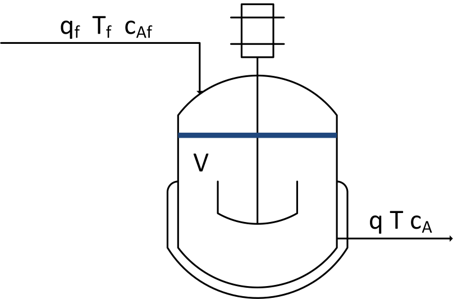

### 4. Analysis

#### Establish model 

Mass balance

$$
\frac{d(\rho V)}{dt} = \rho q_f - \rho q
$$

$$
\frac{dV}{dt} =  q_f -  q \tag{1}
$$

Specie balance

$$
\frac{d(c_A V)}{dt} = q_f c_{Ai} - q c_A  
$$

$$
V \frac{dc_A}{dt} + c_A \frac{dV}{dt} = q_f c_{Ai} - q c_A  
$$


$$
V \frac{dc_A}{dt} + c_A \left( q_f -  q \right) = q_f c_{Ai} - q c_A  
$$

$$
V \frac{dc_A}{dt} = q_f (c_{Ai} - c_A)  \tag{2} 
$$

Energy balance in the tank

$$
\frac{d(U_{tot})}{dt} = \rho q_f \hat{U}_{tot,i} - \rho q \hat{U}_{tot} 
$$

$$
\rho C_p \frac{d(VT)}{dt} = \rho q_f C_p T_f - \rho q C_p T 
$$

$$
T\frac{dV}{dt} + V\frac{dT}{dt} =  q_f T_f - \ q  T 
$$

$$
T \left( q_f - q \right) + V\frac{dT}{dt} =  q_f T_f - \ q  T 
$$

$$
V\frac{dT}{dt} =  q_f (T_f - T) \tag{3}
$$

#### Steady state 

It's straightforward to show the steady state from this system is 

$$c_{Ai} = c_A$$

and

$$T_{f} = T$$

In [2]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
# define mixing model
def vessel(x,t,q,qf,Caf,Tf):
    # Inputs (4):
    # qf  = Inlet Volumetric Flowrate (L/min)
    # q   = Outlet Volumetric Flowrate (L/min)
    # Caf = Feed Concentration (mol/L)
    # Tf  = Feed Temperature (K)

    # States (3):
    # Volume (L)
    V = x[0]
    # Concentration of A (mol/L)
    Ca = x[1]
    # Temperature (K)
    T = x[2]

    # Parameters:
    # Reaction
    rA = 0.0

    # Mass balance: volume derivative
    dVdt = qf - q

    # Species balance: concentration derivative
    # Chain rule: d(V*Ca)/dt = Ca * dV/dt + V * dCa/dt
    dCadt = (qf*Caf - q*Ca)/V - rA - (Ca*dVdt/V)

    # Energy balance: temperature derivative
    # Chain rule: d(V*T)/dt = T * dV/dt + V * dT/dt
    dTdt = (qf*Tf - q*T)/V - (T*dVdt/V)

    # Return derivatives
    return [dVdt,dCadt,dTdt]

In [4]:
# Initial Conditions for the States
V0 = 1.0
Ca0 = 0.0
T0 = 350.0
y0 = [V0,Ca0,T0]

In [13]:
# Time Interval (min)
t = np.linspace(0,10,100)

# Inlet Volumetric Flowrate (L/min)
qf = np.ones(len(t))* 5.2
qf[50:] = 5.1

# Outlet Volumetric Flowrate (L/min)
q = np.ones(len(t))*5.0

# Feed Concentration (mol/L)
Caf = np.ones(len(t))*1.0
Caf[30:] = 0.5

# Feed Temperature (K)
Tf = np.ones(len(t))*300.0
Tf[70:] = 325.0

In [14]:
# Storage for results
V  = np.ones(len(t))*V0
Ca = np.ones(len(t))*Ca0
T  = np.ones(len(t))*T0

In [15]:
y0 = [V0,Ca0,T0] # reset initial conditions 
# Loop through each time step
for i in range(len(t)-1):
    # Simulate
    inputs = (q[i],qf[i],Caf[i],Tf[i]) # this is a tuple
    ts = [t[i],t[i+1]]
    y = odeint(vessel,y0,ts,args=inputs)
    # Store results
    V[i+1]  = y[-1][0]
    Ca[i+1] = y[-1][1]
    T[i+1]  = y[-1][2]
    # Adjust initial condition for next loop
    y0 = y[-1]

In [16]:
# Construct results and save data file
data = np.vstack((t,qf,q,Tf,Caf,V,Ca,T)) # vertical stack
data = data.T             # transpose data
np.savetxt('data.txt',data,delimiter=',')

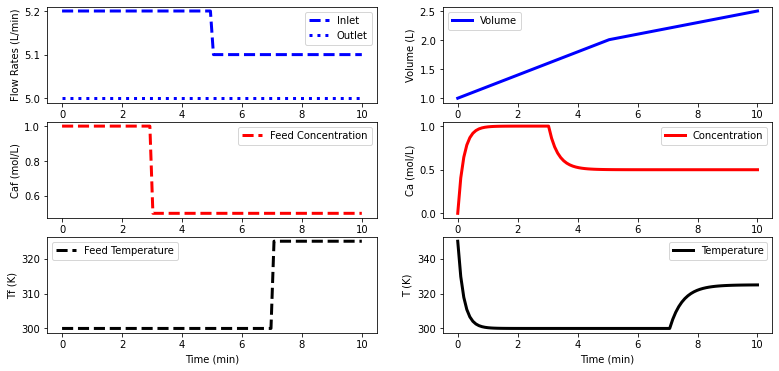

In [17]:
# Plot the inputs and results
plt.figure(figsize = (13,6))

plt.subplot(3,2,1)
plt.plot(t,qf,'b--',linewidth=3)
plt.plot(t,q,'b:',linewidth=3)
plt.ylabel('Flow Rates (L/min)')
plt.legend(['Inlet','Outlet'],loc='best')

plt.subplot(3,2,3)
plt.plot(t,Caf,'r--',linewidth=3)
plt.ylabel('Caf (mol/L)')
plt.legend(['Feed Concentration'],loc='best')

plt.subplot(3,2,5)
plt.plot(t,Tf,'k--',linewidth=3)
plt.ylabel('Tf (K)')
plt.legend(['Feed Temperature'],loc='best')
plt.xlabel('Time (min)')

plt.subplot(3,2,2)
plt.plot(t,V,'b-',linewidth=3)
plt.ylabel('Volume (L)')
plt.legend(['Volume'],loc='best')

plt.subplot(3,2,4)
plt.plot(t,Ca,'r-',linewidth=3)
plt.ylabel('Ca (mol/L)')
plt.legend(['Concentration'],loc='best')

plt.subplot(3,2,6)
plt.plot(t,T,'k-',linewidth=3)
plt.ylabel('T (K)')
plt.legend(['Temperature'],loc='best')
plt.xlabel('Time (min)')

plt.show()